# TechX 2020 计算社科预习 Quiz 3 V1.0

这个测试的目的不是为了难倒大家，而是为了检验预习成果，方便我们调整接下来的预习和课程安排。同时，我们也希望你们能通过这几个练习学到的知识，并学到的coding技巧。因此，我们有如下要求：
1. 虽然我们不允许大家向别人请教 quiz 中的问题，但是你们可以在互联网上搜索已有的资源：这也是在TechX的学习过程中大家会一直做的。（PS 请别直接抄代码！请理解之后自己实现）
2. 有些题目里会给出一些变量/数据，但是我们批改的时候可能会改动它们以检测你程序的可拓展性。
3. 请在北京时间 8.2 24:00之前在教学立方提交，如有事无法按时请私信自己的对应AL（在预习文档里 https://shimo.im/docs/eIy4MXRYkLoZvE2Z ）。
4. 如果感觉题目有问题或表述不清请直接在群里提出。我们有可能根据大家的提问发布V2.0 的 Quiz。

## 0. Setup

请在下面导入numpy(用np代替)，pandas（用pd代替）, 以及 matplotlib的相关包

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Plotting
下面所有的图都需要有以下元素：
1. 标题
2. 坐标轴的annotation
3. 相关 legends

a. 用pandas导入 Data Science Handbook notebooks/data/中的 state-population.csv 文件，把它命名为df

In [5]:
df =pd.read_csv(r"E:\plot\state-population.csv")
df

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


b. 在df的时间范围里，请选择合适的数据图展示 California 与 Texas 的总人口变化，并用你喜欢的颜色区分他们两个。

In [44]:
ca = df[(df["ages"]=="total")&(df["state/region"]=="CA")][["year","population"]].set_index("year")
tx =df[(df["ages"]=="total")&(df["state/region"]=="TX")][["year","population"]].set_index("year")

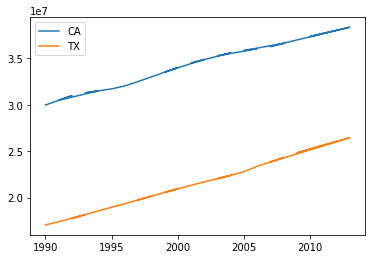

In [48]:
plt.plot(ca,label="CA")
plt.plot(tx,label="TX")
plt.legend()

c. 选用合适的bin number来展示 2010 年美国各州的18岁以下人口的频率直方图(histogram)。

In [57]:
bin_data= df[(df["ages"]=="under18")&(df["year"]==2010)][:-1]

(array([5., 6., 2., 2., 1., 1., 4., 4.]),
 array([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000,
        900000]),
 <a list of 8 Patch objects>)

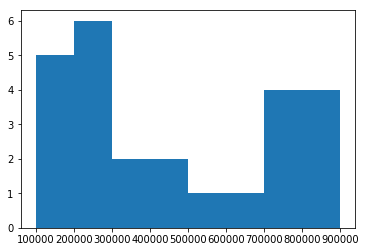

In [61]:
bins=np.arange(100000,1000000,100000)
plt.hist(bin_data["population"],bins)

d. 用scatter plot展示2005-2010美国各州平均总人口与平均增长率的关系（请注意平均增长率的计算方式）。
描述有哪些州比较特殊，根据你的知识分析这些州特殊的原因。

In [186]:
sc_data =df[(df["ages"]=="total")&(df["year"]>=2005)&(df["year"]<=2010)][:-1]
l=list(set(df["state/region"]))
l.remove("USA")
rate =[]  # 增长率
for c in l:
    temp= sc_data[sc_data["state/region"]==c]["population"]
    sd =round((temp.diff()/temp)[1:].sum()/5,3)  # 计算平均增长率
    rate.append(sd)
population = sc_data["population"].groupby(sc_data["state/region"]).mean()
population =population.drop("USA")  # 

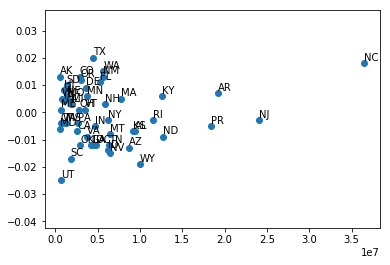

In [187]:
txt =l
plt.scatter(population, rate)
for i in range(len(population)):
    plt.annotate(txt[i], xy = (population[i], rate[i]), xytext = (population[i]+0.001, rate[i]+0.001))
plt.show()

In [188]:
df[(df["state/region"]=="UT")&(df["ages"]=="under18")&(df["year"]>=2005)&(df["year"]<=2010)][:-1]

,state/region,ages,year,population
2116,UT,under18,2010,873019.0
2119,UT,under18,2009,857853.0
2123,UT,under18,2007,815496.0
2125,UT,under18,2008,837258.0
2127,UT,under18,2006,789957.0


In [189]:
df[(df["state/region"]=="NC")&(df["ages"]=="under18")&(df["year"]>=2005)&(df["year"]<=2010)][:-1]

,state/region,ages,year,population
1615,NC,under18,2005,2122485.0
1617,NC,under18,2006,2166393.0
1619,NC,under18,2008,2252101.0
1621,NC,under18,2007,2219168.0
1625,NC,under18,2009,2272955.0


In [190]:
df[(df["state/region"]=="TX")&(df["ages"]=="under18")&(df["year"]>=2005)&(df["year"]<=2010)][:-1]

,state/region,ages,year,population
2095,TX,under18,2005,6290970.0
2097,TX,under18,2006,6446798.0
2099,TX,under18,2008,6675917.0
2101,TX,under18,2007,6565872.0
2105,TX,under18,2009,6792907.0


# 2. 数学

a. 请在一个x-y坐标系内画出 $y = 2x^2+1$ 的图像，并说明在x=1的时候，此函数的导数的值以及它的几何意义。请在同一个坐标系里画出在x=1时该方程的切线。

In [ ]:
x = np.linspace(0, 2, 50)
y = 2*x**2+1
plt.plot(x,y)
plt.plot(x,4*x-1)
plt.show()
导数为4 几何意义为此图像在该点的斜率

b. 请用 04.04 中的方法，画出函数 $z = x^2 + y^2$ 在 $|x|\leq 3, |y| \leq 3$内的contour plot (用颜色体现z的大小)。根据你的理解，分别解释此函数 $x=0, y=0$ 以及 $x = 1, y = 0$ 两个点的时候 gradient(梯度) 的大小以及方向。

In [ ]:
def f(x, y):
    return x**2=y**2

x = np.linspace(0, 3, 50)
y = np.linspace(0, 3, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, 20, cmap='RdGy')

c. 用自选方法计算下面矩阵乘法的结果（推荐手算）：

i. $$
\begin{pmatrix}
0 & 4 & 3
\end{pmatrix}
\begin{pmatrix}
9 \\
0 \\
3
\end{pmatrix}
$$

ii.
$$
\begin{pmatrix}
9 \\
0 \\
3
\end{pmatrix}
\begin{pmatrix}
0 & 4 & 3
\end{pmatrix}
$$

iii. 
$$
\begin{pmatrix}
9 & 3 \\
0 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
0 & 4 & 3 \\
0 & 4 & 3
\end{pmatrix}
$$

In [ ]:
(9)

In [ ]:
无意义

In [ ]:
[0 48 36]
[0  8  6]
[0 28 21]

d. 使用 seaborn 中的 regplot 功能对你在1d中计算的数据进行线性回归。描述你发现的关系并给出可能的原因。

# 反馈
如果你对这个quiz的难度，预习的进度，以及课程目前以来的任何方面有任何建议或者问题都欢迎写在下面！